In [ ]:
# @ElsaTH

In [24]:
import pandas as pd                                         
import numpy as pn
import matplotlib.pyplot as plt 

## PROYECTO GRUPAL COVID
A partir de la url proporcionada, obtenemos unos datos los cuales limpiamos y adaptamos a nuestras necesidades.


In [25]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv" 
data = pd.read_csv(url, date_parser="date")
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39477,NaN,NaN,International,2020-08-21,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39478,NaN,NaN,International,2020-08-22,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39479,NaN,NaN,International,2020-08-23,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39480,NaN,NaN,International,2020-08-24,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Comprobación de todas las columntas que tenemos:

In [29]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Procedemos a la limpieza de datos, quedandonos las columnas necesarias:

In [26]:
data2 = data.loc[:,["location","date", "total_deaths", "total_cases" ]].dropna()
data2

,location,date,total_deaths,total_cases
0,Aruba,2020-03-13,0.0,2.0
2,Aruba,2020-03-20,0.0,4.0
6,Aruba,2020-03-24,0.0,12.0
7,Aruba,2020-03-25,0.0,17.0
8,Aruba,2020-03-26,0.0,19.0
...,...,...,...,...
39477,International,2020-08-21,7.0,696.0
39478,International,2020-08-22,7.0,696.0
39479,International,2020-08-23,7.0,696.0
39480,International,2020-08-24,7.0,696.0


In [5]:
data2["recuperation"] = data2.total_cases - data2.total_deaths
data2

,location,date,total_deaths,total_cases,recuperation
0,Aruba,2020-03-13,0.0,2.0,2.0
2,Aruba,2020-03-20,0.0,4.0,4.0
6,Aruba,2020-03-24,0.0,12.0,12.0
7,Aruba,2020-03-25,0.0,17.0,17.0
8,Aruba,2020-03-26,0.0,19.0,19.0
...,...,...,...,...,...
39477,International,2020-08-21,7.0,696.0,689.0
39478,International,2020-08-22,7.0,696.0,689.0
39479,International,2020-08-23,7.0,696.0,689.0
39480,International,2020-08-24,7.0,696.0,689.0


In [27]:
data2.set_index(["location"],inplace=True)
data2

,date,total_deaths,total_cases
location,,,
Aruba,2020-03-13,0.0,2.0
Aruba,2020-03-20,0.0,4.0
Aruba,2020-03-24,0.0,12.0
Aruba,2020-03-25,0.0,17.0
Aruba,2020-03-26,0.0,19.0
...,...,...,...
International,2020-08-21,7.0,696.0
International,2020-08-22,7.0,696.0
International,2020-08-23,7.0,696.0


In [28]:
data2 = data2.loc[["Argentina", "Spain", "Chile", "Russia", "Colombia"],:]
data2

,date,total_deaths,total_cases
location,,,
Argentina,2020-03-04,0.0,1.0
Argentina,2020-03-06,0.0,2.0
Argentina,2020-03-07,0.0,8.0
Argentina,2020-03-08,1.0,9.0
Argentina,2020-03-09,1.0,12.0
...,...,...,...
Colombia,2020-08-21,16183.0,513719.0
Colombia,2020-08-22,16568.0,522138.0
Colombia,2020-08-23,16968.0,533103.0


In [ ]:
#################

OBTENGO LOS DATOS POR PAIS:

SPAIN:

In [8]:
spain = data2.loc["Spain",:]
spain.reset_index(inplace=True)
spain.set_index("date",inplace=True)

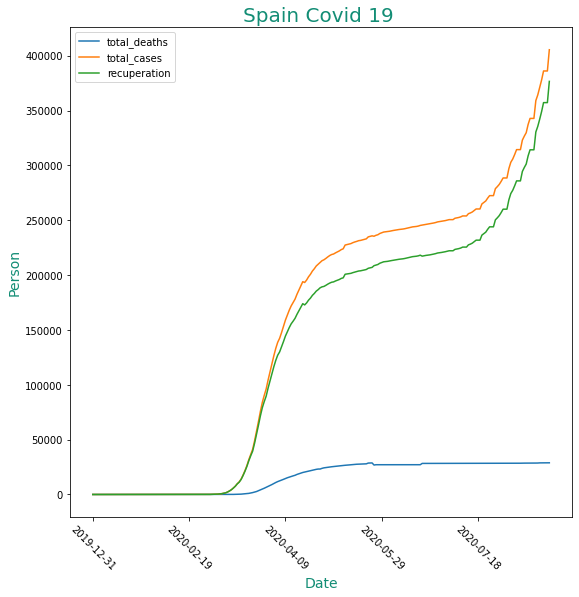

In [9]:
spain.plot(figsize=(9,9), rot=-45)
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.title("Spain Covid 19 ", size=20, color="#138D75")
plt.savefig('Spain_covid.png')

ARGENTINA:

In [8]:
argentina = data2.loc["Argentina",:]
argentina.reset_index(inplace=True)
argentina.set_index("date",inplace=True)

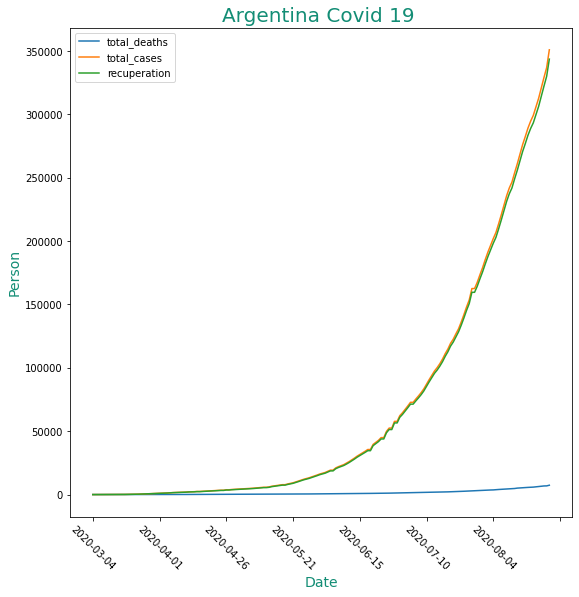

In [9]:
argentina.plot(figsize=(9,9), rot=-45)
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.title("Argentina Covid 19 ", size=20, color="#138D75")
plt.savefig('Argentina_covid.png')

COLOMBIA:

In [29]:
colombia = data2.loc["Colombia",:]
colombia.reset_index(inplace=True)
colombia.set_index("date",inplace=True)


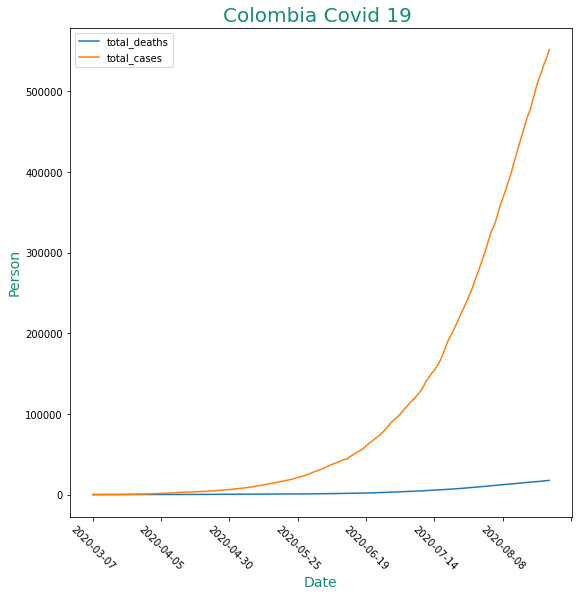

In [30]:
colombia.plot(figsize=(9,9), rot=-45)
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.title("Colombia Covid 19 ", size=20, color="#138D75")
plt.savefig('Colombia_covid.png')

RUSIA:

In [12]:
rusia = data2.loc["Russia",:]
rusia.reset_index(inplace=True)
rusia.set_index("date",inplace=True)

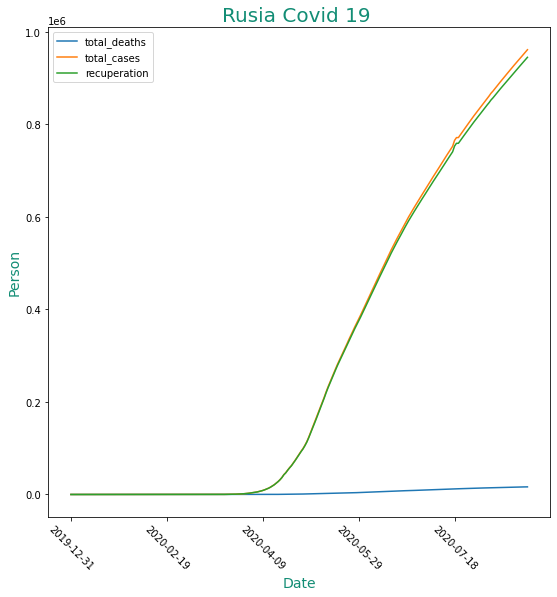

In [13]:
rusia.plot(figsize=(9,9), rot=-45)
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.title("Rusia Covid 19 ", size=20, color="#138D75")
plt.savefig('Rusia_covid.png')

CHILE:

In [14]:
chile = data2.loc["Chile",:]
chile.reset_index(inplace=True)
chile.set_index("date",inplace=True)

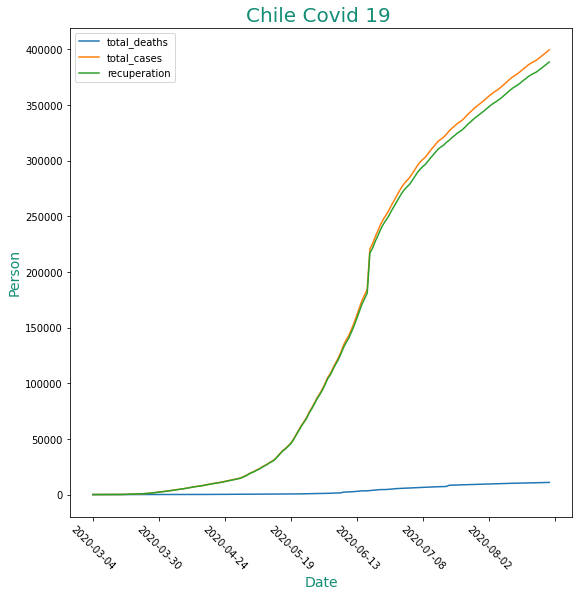

In [15]:
chile.plot(figsize=(9,9), rot=-45)
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.title("Chile Covid 19 ", size=20, color="#138D75")
plt.savefig('Chile_covid.png')


In [ ]:
##################

In [ ]:
OBTENGO LOS DATOS PARA TOTAL_DEATHS, NEW _CASES, RECUPERATION:

In [17]:
data2.reset_index(inplace=True)
data2.set_index("date", inplace=True)


In [18]:
Spain = data2[data2.location == 'Spain']
Argentina = data2[data2.location == 'Argentina']
Rusia = data2[data2.location == 'Russia']
Colombia = data2[data2.location == 'Colombia']
Chile = data2[data2.location == 'Chile']

### Histograma del total de las muertes

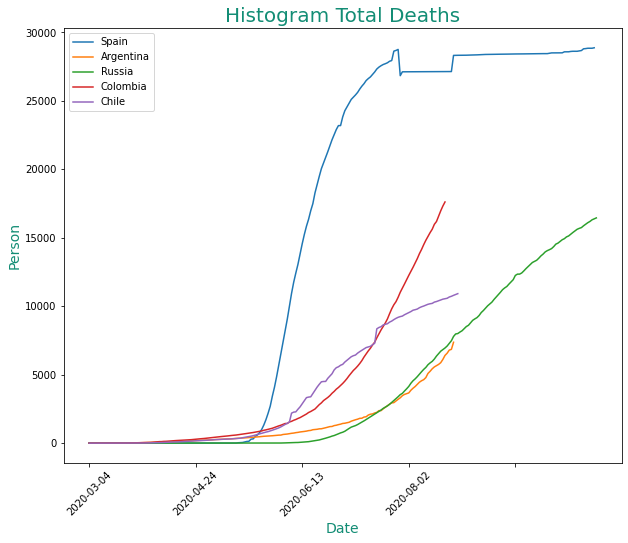

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(10, 8))
Spain.total_deaths.plot(kind="line",label='Spain')
Argentina.total_deaths.plot(kind="line",label='Argentina')
Rusia.total_deaths.plot(kind="line",label='Russia')
Colombia.total_deaths.plot(kind="line",label='Colombia')
Chile.total_deaths.plot(kind="line",label='Chile')
plt.legend(loc='top_right')
plt.title('Histogram Total Deaths', size=20, color="#138D75")
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.xticks(rotation=45)
plt.show()
plt.savefig('Histogram_total_deaths.png')

### Histograma del total de los casos de infectados

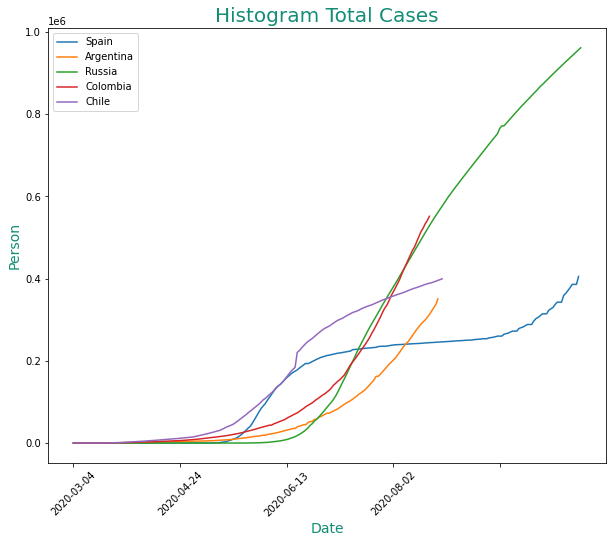

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(10, 8))
Spain.total_cases.plot(kind="line",label='Spain')
Argentina.total_cases.plot(kind="line",label='Argentina')
Rusia.total_cases.plot(kind="line",label='Russia')
Colombia.total_cases.plot(kind="line",label='Colombia')
Chile.total_cases.plot(kind="line",label='Chile')
plt.legend(loc='top_right')
plt.title('Histogram Total Cases', size=20, color="#138D75")
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.xticks(rotation=45)
plt.show()
plt.savefig('Histogram_total_cases.png')

### Histograma del total de las recuperaciones

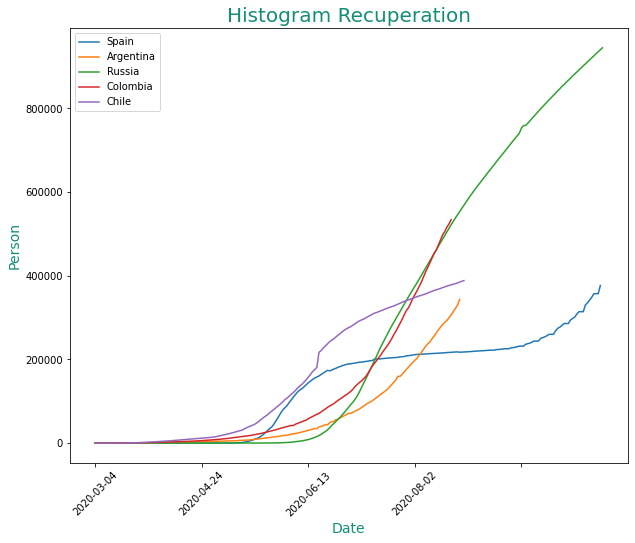

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(10, 8))
Spain.recuperation.plot(kind="line",label='Spain')
Argentina.recuperation.plot(kind="line",label='Argentina')
Rusia.recuperation.plot(kind="line",label='Russia')
Colombia.recuperation.plot(kind="line",label='Colombia')
Chile.recuperation.plot(kind="line",label='Chile')
plt.legend(loc='top_right')
plt.title('Histogram Recuperation', size=20, color="#138D75")
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.xticks(rotation=45)
plt.show()
plt.savefig('Histogram_recuperation.png')